In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df[['loan_intent']].value_counts()
#df.head()

loan_intent      
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                       shuffle = True,
#                                                       random_state = 440,
#                                                       test_size = .2)
#
#
#bb_train, bb_test = train_test_split(baseball.copy(),
#                                        random_state = 614,
#                                        shuffle = True,
#                                        test_size=.2)
df_train, df_test=train_test_split(df.copy(), shuffle=True, random_state=42, test_size=.2)

In [6]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
14337,14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15,0
17117,17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9,0
32590,32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3,0
55811,55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11,0
40120,40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2,0


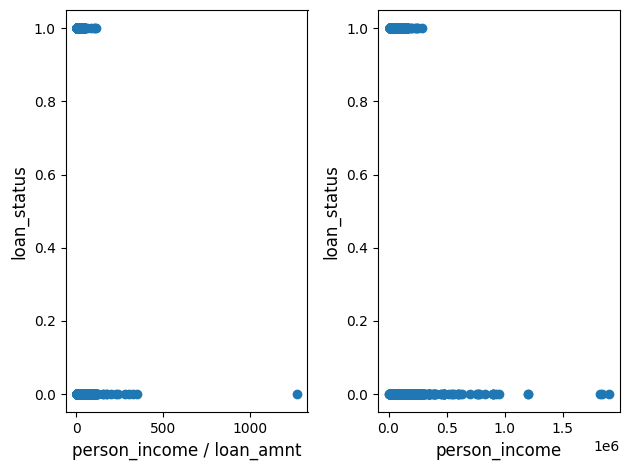

In [7]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(df_train['person_income']/df_train['loan_amnt'], df_train['loan_status'])

ax[0].set_ylabel('loan_status', fontsize=12)
ax[0].set_xlabel('person_income / loan_amnt', fontsize=12)


ax[1].scatter(df_train['person_income'], df_train['loan_status'])

ax[1].set_ylabel('loan_status', fontsize=12)
ax[1].set_xlabel('person_income', fontsize=12)


plt.tight_layout() #this command is to automatically adjust so that the two plots don't overlap
plt.show()

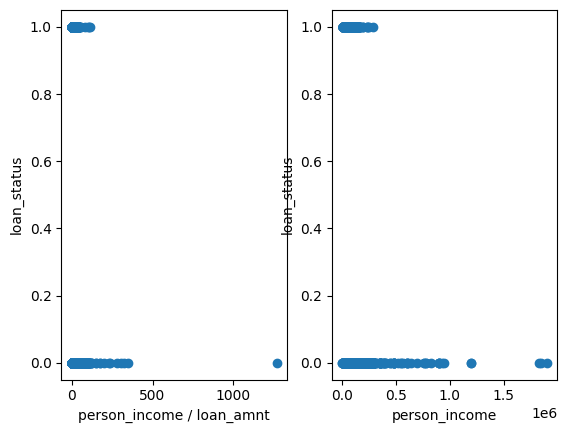

In [8]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(df_train['person_income']/df_train['loan_amnt'], df_train['loan_status'])

ax[0].set_ylabel('loan_status')
ax[0].set_xlabel('person_income / loan_amnt')


ax[1].scatter(df_train['person_income'], df_train['loan_status'])

ax[1].set_ylabel('loan_status')
ax[1].set_xlabel('person_income')

plt.show()

In [9]:
df.loan_status.value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'person_age'}>],
       [<Axes: title={'center': 'person_emp_length'}>, <Axes: >]],
      dtype=object)

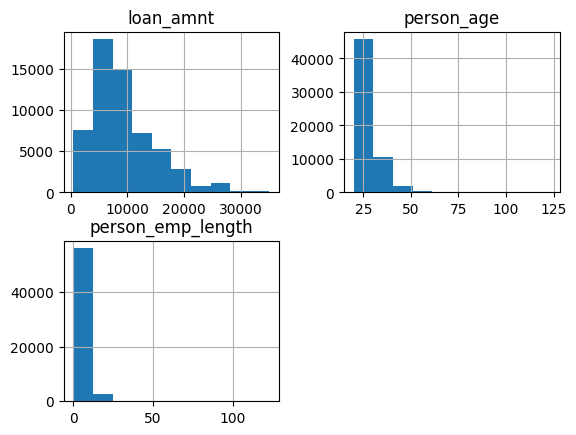

In [10]:
df[['loan_amnt','person_age','person_emp_length']].hist()

In [11]:
display(df.drop(['id','person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1).cov())
display(df.drop(['id','person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1).corr())



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,36.399693,2.338253e+04,2.897308,1.691081e+03,0.176737,-0.017688,21.252388,-0.002381
person_income,23382.533804,1.438769e+09,24638.998894,6.562165e+07,-6631.618739,-974.924487,12643.351463,-2252.738856
person_emp_length,2.897308,2.463900e+04,15.679892,2.027909e+03,-1.224624,-0.023899,1.640814,-0.138965
loan_amnt,1691.081026,6.562165e+07,2027.908737,3.095595e+07,1917.773811,330.206499,1024.930001,281.880893
loan_int_rate,0.176737,-6.631619e+03,-1.224624,1.917774e+03,9.209387,0.042351,0.092130,0.359440
loan_percent_income,-0.017688,-9.749245e+02,-0.023899,3.302065e+02,0.042351,0.008407,-0.008572,0.012121
cb_person_cred_hist_length,21.252388,1.264335e+04,1.640814,1.024930e+03,0.092130,-0.008572,16.234422,-0.004266
loan_status,-0.002381,-2.252739e+03,-0.138965,2.818809e+02,0.359440,0.012121,-0.004266,0.122112


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


In [12]:
import seaborn as sns

<Axes: >

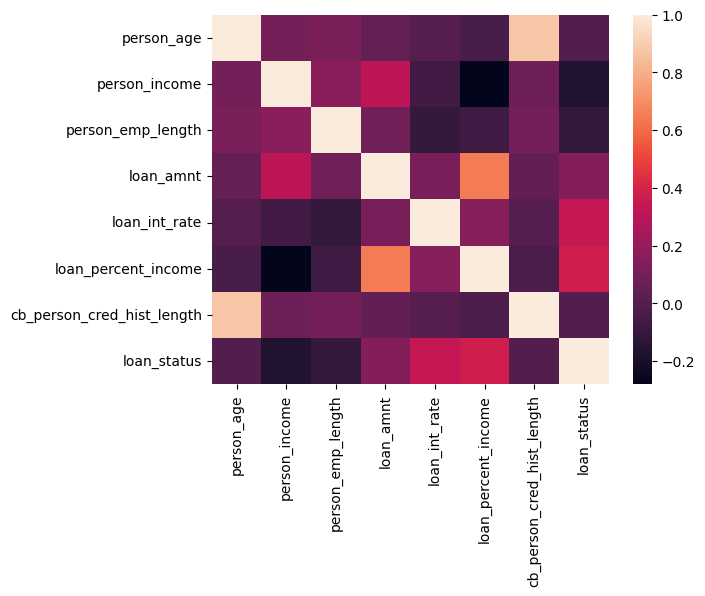

In [13]:
sns.heatmap(df.drop(['id','person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1).corr())

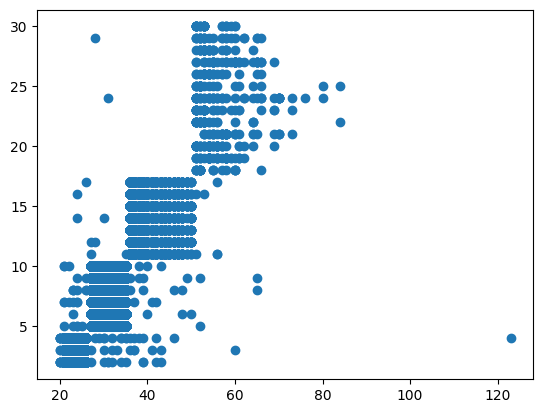

In [14]:
plt.scatter(df['person_age'],df['cb_person_cred_hist_length'])

<Axes: ylabel='Count'>

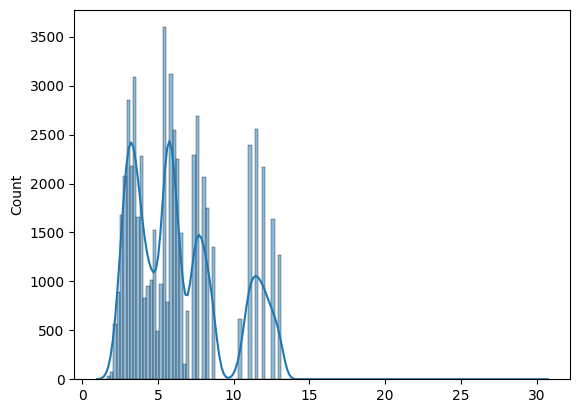

In [15]:
sns.histplot(df['person_age']/df['cb_person_cred_hist_length'],kde=True)

<Axes: ylabel='Count'>

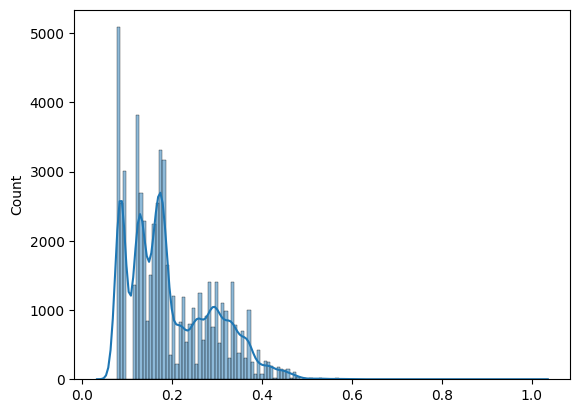

In [16]:
sns.histplot(df['cb_person_cred_hist_length']/df['person_age'],kde=True)

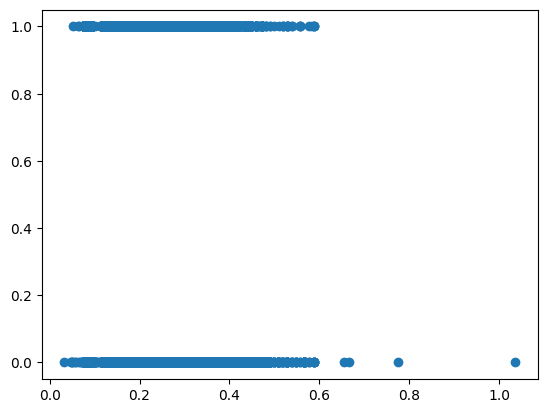

In [17]:
plt.scatter(x=df['cb_person_cred_hist_length']/df['person_age'],y=df['loan_status'])

In [18]:
df.loc[df['cb_person_cred_hist_length']/df['person_age']>.6]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11996,11996,31,117516,MORTGAGE,3.0,MEDICAL,C,21000,13.49,0.18,N,24,0
12924,12924,24,70000,RENT,7.0,EDUCATION,D,12000,16.77,0.17,Y,16,0
21827,21827,28,186480,MORTGAGE,2.0,PERSONAL,A,10000,5.42,0.05,N,29,0
46232,46232,26,90000,MORTGAGE,0.0,VENTURE,B,4200,10.59,0.05,N,17,0


In [19]:
df.loc[df['person_age']>50]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
222,222,51,82000,MORTGAGE,21.0,PERSONAL,A,10000,6.99,0.12,N,23,0
430,430,56,50000,RENT,0.0,PERSONAL,C,3000,13.22,0.06,Y,23,0
487,487,56,70000,MORTGAGE,0.0,PERSONAL,A,13000,6.17,0.19,N,24,0
547,547,56,51600,RENT,3.0,PERSONAL,B,15000,10.37,0.29,N,20,0
597,597,60,45000,RENT,1.0,PERSONAL,C,8000,12.99,0.18,N,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58221,58221,52,33204,RENT,0.0,PERSONAL,C,5600,14.35,0.17,Y,24,1
58242,58242,53,90000,MORTGAGE,7.0,PERSONAL,A,5600,8.63,0.06,N,30,0
58436,58436,53,26500,RENT,1.0,EDUCATION,C,5000,13.79,0.19,Y,30,0
58552,58552,54,60000,RENT,4.0,PERSONAL,B,8000,10.37,0.13,N,20,0
